In [142]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
sns.set()
%matplotlib inline
#sns.set_palette("Set1")
#sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")

# (Section 1) Before neural networks: Logistic regression

## 1.1 The iris dataset

In [144]:
iris = sns.load_dataset("iris")

In [145]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [146]:
iris.shape

(150, 5)

In [147]:
iris.species.value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

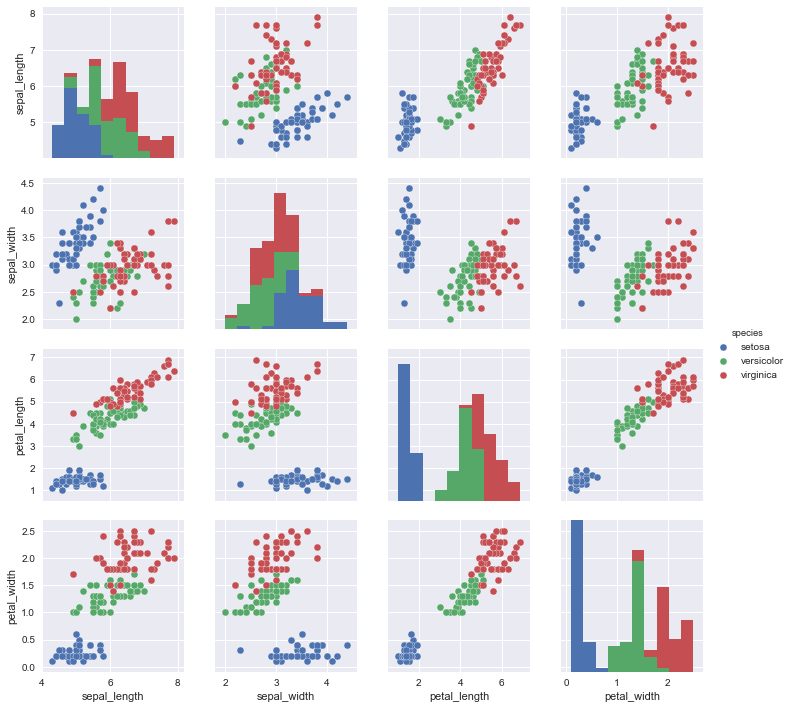

In [148]:
sns.pairplot(iris, hue="species")

In [149]:
def plot_histogram(my_species,feature,n_bins=20,normed=None,data=iris):
    """Plot a histogram of the given feature according to a given species."""
    mask = data['species']==my_species
    hist0 = data[feature][~mask]
    hist1 = data[feature][mask]
    histograms = [hist0,hist1]
    labels = ['not '+my_species, my_species]
    fig,ax = plt.subplots(figsize=(12,5))
    plt.hist(histograms, histtype='bar',bins=n_bins,normed=normed,label=labels);
    plt.title(my_species,fontsize='xx-large')
    plt.xlabel(feature,fontsize='x-large')
    plt.legend(fontsize='x-large')
    ax.tick_params(labelsize='large')

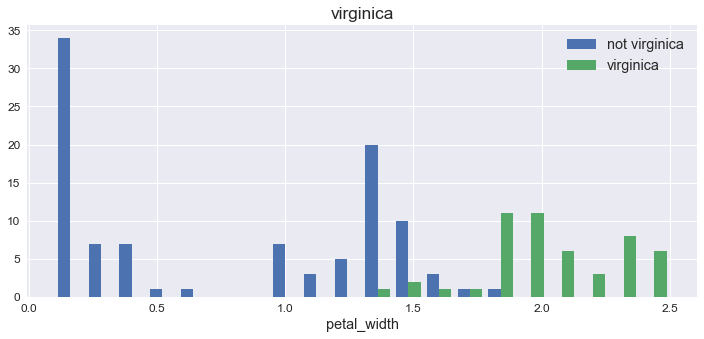

In [150]:
plot_histogram('virginica','petal_width')

# Problem we want to address: knowing the petal width, predict if the iris is a virginica

## 1.2 Logistic regression with sklearn: guessing virginica knowing the petal width

In [151]:
import sklearn.linear_model

In [152]:
x = iris['petal_width'].reshape(-1,1)

In [153]:
y = iris.species.apply(lambda x: 1 if x=='virginica' else 0)

In [154]:
model_sklearn = sklearn.linear_model.LogisticRegression()

In [155]:
model_sklearn.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

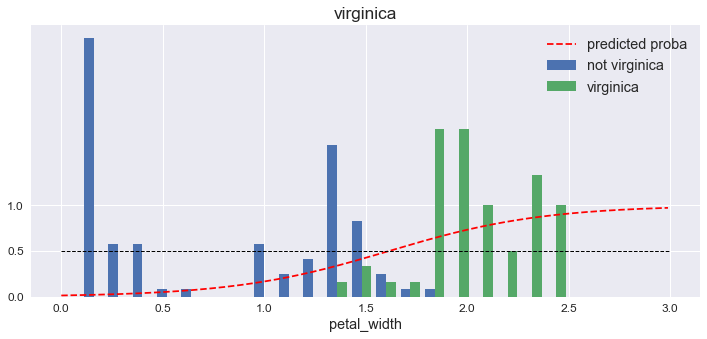

In [156]:
plot_histogram('virginica','petal_width',normed=True)
petal_widths = np.arange(0,3,0.01)
predicted_proba = model_sklearn.predict_proba(petal_widths.reshape(-1,1))[:,1]
plt.plot(petal_widths,predicted_proba,'r--',label='predicted proba')
plt.plot([0,3],[.5,.5],'k--',linewidth=1)
plt.legend(fontsize='x-large')
plt.yticks([0,0.5,1]);

In [157]:
model_sklearn.score(x,y)

0.95999999999999996

# Keras

In [158]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import regularizers
from keras import optimizers

In [159]:
model_keras = Sequential()

In [160]:
layer0 = Dense(1,input_dim=1,kernel_regularizer=regularizers.l2(.1))
model_keras.add(layer0)

In [161]:
layer1 = Activation('sigmoid')
model_keras.add(layer1)

In [162]:
model_keras.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [163]:
def initialize_keras(reg = .1):
    model_keras = Sequential()
    layer0 = Dense(1,input_dim=1,kernel_regularizer=regularizers.l2(reg))
    model_keras.add(layer0)
    layer1 = Activation('sigmoid')
    model_keras.add(layer1)
    sgd = optimizers.SGD(lr=0.05)
    model_keras.compile(optimizer=sgd, loss='binary_crossentropy',metrics=['accuracy'])
    return model_keras

In [164]:
model_keras.fit(x,y,epochs=100)

Epoch 1/100
150/150 [==============================] - 0s 2ms/step - loss: 0.9996 - acc: 0.3333
Epoch 2/100
150/150 [==============================] - 0s 70us/step - loss: 0.9745 - acc: 0.3333
Epoch 3/100
150/150 [==============================] - 0s 58us/step - loss: 0.9508 - acc: 0.3333
Epoch 4/100
150/150 [==============================] - 0s 57us/step - loss: 0.9283 - acc: 0.3333
Epoch 5/100
150/150 [==============================] - 0s 53us/step - loss: 0.9071 - acc: 0.3333
Epoch 6/100
150/150 [==============================] - 0s 60us/step - loss: 0.8866 - acc: 0.3667
Epoch 7/100
150/150 [==============================] - 0s 72us/step - loss: 0.8672 - acc: 0.3667
Epoch 8/100
150/150 [==============================] - 0s 67us/step - loss: 0.8490 - acc: 0.3667
Epoch 9/100
150/150 [==============================] - 0s 58us/step - loss: 0.8317 - acc: 0.3667
Epoch 10/100
150/150 [==============================] - 0s 91us/step - loss: 0.8156 - acc: 0.5200
Epoch 11/100
150/150 [========

150/150 [==============================] - 0s 68us/step - loss: 0.5644 - acc: 0.8667
Epoch 85/100
150/150 [==============================] - 0s 63us/step - loss: 0.5640 - acc: 0.8600
Epoch 86/100
150/150 [==============================] - 0s 62us/step - loss: 0.5635 - acc: 0.8600
Epoch 87/100
150/150 [==============================] - 0s 60us/step - loss: 0.5631 - acc: 0.8600
Epoch 88/100
150/150 [==============================] - 0s 68us/step - loss: 0.5627 - acc: 0.8600
Epoch 89/100
150/150 [==============================] - 0s 62us/step - loss: 0.5624 - acc: 0.8600
Epoch 90/100
150/150 [==============================] - 0s 68us/step - loss: 0.5620 - acc: 0.8600
Epoch 91/100
150/150 [==============================] - 0s 64us/step - loss: 0.5617 - acc: 0.8600
Epoch 92/100
150/150 [==============================] - 0s 54us/step - loss: 0.5612 - acc: 0.8600
Epoch 93/100
150/150 [==============================] - 0s 65us/step - loss: 0.5608 - acc: 0.8600
Epoch 94/100
150/150 [===========

In [165]:
model_keras.metrics_names

['loss', 'acc']

In [166]:
model_keras.evaluate(x,y)

150/150 [==============================] - 0s 1ms/step


[0.55791443030039467, 0.85999999602635702]

In [167]:
model_keras.get_weights()

[array([[ 0.46098384]], dtype=float32), array([-0.91625768], dtype=float32)]

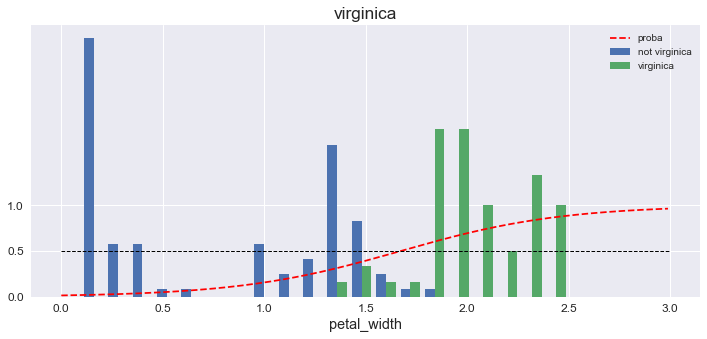

In [168]:
model_keras = initialize_keras(reg=.01)
plot_histogram('virginica','petal_width',normed=True)
petal_widths = np.arange(0,3,0.01)
model_keras.fit(x,y,epochs=500,verbose=0)
predicted_proba = model_keras.predict(petal_widths.reshape(-1,1))[:,0]
plt.plot(petal_widths,predicted_proba,'r--',label='proba')
plt.plot([0,3],[.5,.5],'k--',linewidth=1)
plt.legend()
plt.yticks([0,0.5,1]);

## The sigmoid function

Here the logistic regression algorithm does the following: try to find a function 
$$ P: [0,3] \to [0,1]$$
such that for a random $x \in [0,3]$ corresponding to a petal width, $P(x)$ is an estimate (= a guess) of the probability that the plant is a virginica.

The idea of logistic regression is to look for a function of the form:
$$P_{w,b}(x) = \sigma(wx+b)$$
where 
$$\sigma : \mathbb{R} \to [0,1]$$ is the **sigmoid function ** defined by 
$$ \sigma(x) = \frac{1}{1+e^{-x}}$$
We call $w$ the **weight** and $b$  the **bias**.

In [169]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

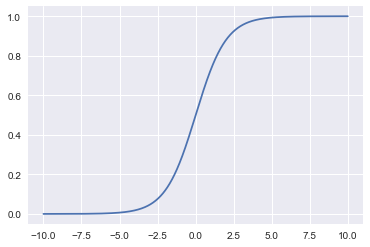

In [170]:
x_sigmoid = np.arange(-10,10,0.01)
y_sigmoid = sigmoid(x_sigmoid)
plt.plot(x_sigmoid,y_sigmoid)

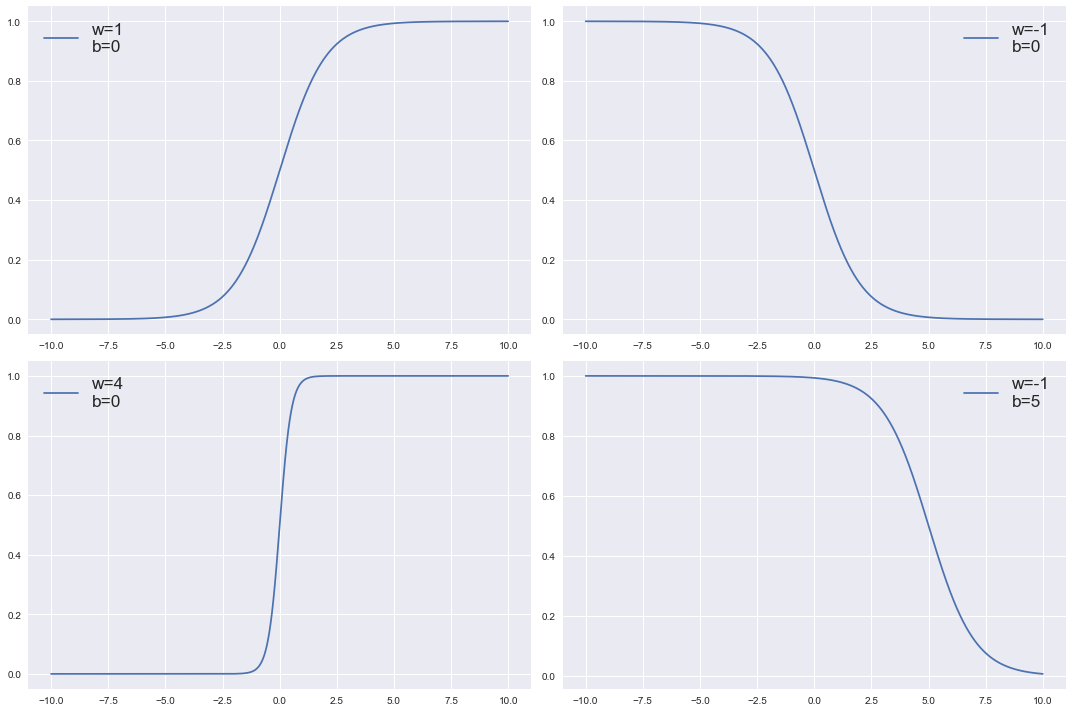

In [171]:
plt.figure(figsize=(15,10))

plt.subplot(221)
w=1
b=0
y_shifted = sigmoid(w*x_sigmoid + b)
plt.plot(x_sigmoid,y_shifted,label='w={}\nb={}'.format(w,b))
plt.legend(fontsize = 'xx-large')
#plt.title('Shifted sigmoid')


plt.subplot(222)
w = -1
b = 0
y_shifted = sigmoid(w*x_sigmoid + b)
plt.plot(x_sigmoid,y_shifted,label='w={}\nb={}'.format(w,b))
plt.legend(fontsize = 'xx-large')

plt.subplot(223)
w = 4
b = 0
y_shifted = sigmoid(w*x_sigmoid + b)
plt.plot(x_sigmoid,y_shifted,label='w={}\nb={}'.format(w,b))
plt.legend(fontsize = 'xx-large')

plt.subplot(224)
w = -1
b = 5
y_shifted = sigmoid(w*x_sigmoid + b)
plt.plot(x_sigmoid,y_shifted,label='w={}\nb={}'.format(w,b))
plt.legend(fontsize = 'xx-large')

plt.tight_layout()

Ajouter graphe du reseau neronal

Definir accuracy

# (Section 2) Gradient descent

# Optimization, gradient descent with Keras

In [172]:
model = Sequential()
model.add(Dense(1,input_dim=1,kernel_regularizer=regularizers.l2(.1)))
model.add(Activation('sigmoid'))
sgd = optimizers.SGD(lr=0.05)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

In [173]:
def get_meshgrid(xstart,xend,xstep,ystart,yend,ystep):
    xx,yy = np.mgrid[xstart:xend:xstep,ystart:yend:ystep]
    return xx,yy
x_grid, y_grid = get_meshgrid(-10,10,.1,-10,10,.1)

In [174]:
model.metrics_names

['loss', 'acc']

In [175]:
model.evaluate(x,y)

150/150 [==============================] - 0s 2ms/step


[1.4501865736643473, 0.66666666666666663]

## Plot accuracy

In [176]:
def get_accuracy(model,weight,bias,x,y,C=1.):
    """Compute the accuracy function."""
    layer =  model.layers[0]
    layer.set_weights( [ np.array([[weight]]) , np.array([bias]) ] ) 
    accuracy = model.evaluate(x,y,verbose=0)[1]
    return accuracy

def get_accuracy1(weigth,bias):
    return get_accuracy(model,weigth,bias,x_train,y_train,1.)

vaccuracy = np.vectorize(get_accuracy1)

In [177]:
#takes two minutes to run
# acc_grid = vaccuracy(x_grid,y_grid)

In [178]:
# import pickle
# with open('../data/acc_grid', 'wb') as f:
#     # Pickle the 'data' dictionary using the highest protocol available.
#     pickle.dump(acc_grid, f)

In [179]:
import pickle
with open('../data/acc_grid', 'rb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    acc_grid =pickle.load(f)

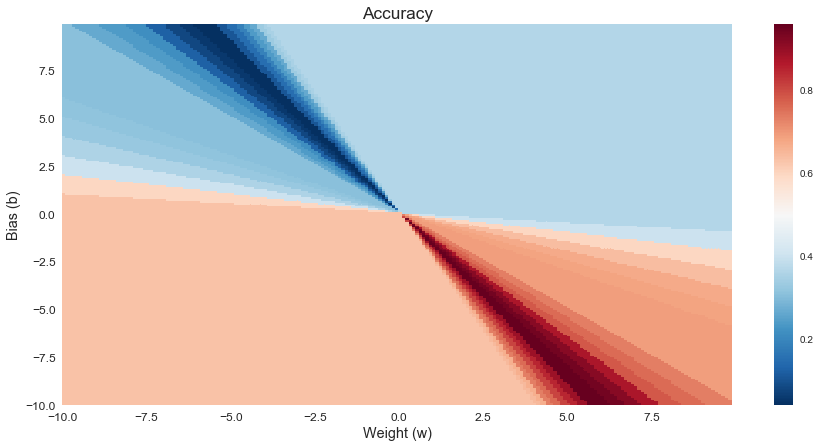

In [180]:
fig,ax_acc = plt.subplots(figsize=(15,7))
plt.pcolor(x_grid,y_grid,acc_grid,cmap='RdBu_r')
plt.colorbar()
plt.title('Accuracy',fontsize='xx-large')
plt.xlabel('Weight (w)',fontsize='x-large')
plt.ylabel('Bias (b)',fontsize='x-large')
ax_acc.tick_params(labelsize='large')

## The loss function

Let us fix $w$ and $b$. We define 
$$\mathcal{L}(p,y) = y \log(p) + (1-y)\log(1-p)$$
$$\mathcal{L_{w,b}} = \sum_{i=1}^n y_i \log(p_i) + (1-y_i)\log(1-p_i)$$
where $y_i\in \{0,1\}$ is the actual classe of the i-th sample and $p_i \in [0,1]$ is the probability $P_{w,b}(x_i)$ calculated by the logistic regression model for parameter values $w$ and $b$.

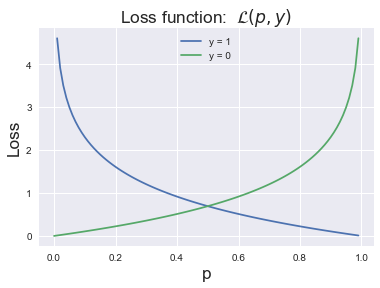

In [181]:
pp = np.arange(0,1,.01)
loss1 = - np.log(pp)
loss0 = -np.log(1-pp)
plt.plot(pp,loss1,label='y = 1')
plt.plot(pp,loss0,label='y = 0')
plt.xlabel('p',fontsize='xx-large')
plt.ylabel('Loss',fontsize='xx-large')
plt.title('Loss function:  $\mathcal{L}(p,y)$',fontsize='xx-large')
_=plt.legend()

In [182]:
def initialise_keras_model(initial_weight = 9,initial_bias = 9,lr=0.05,reg=.1):
    model = Sequential()
    model.add(Dense(1,input_dim=1,kernel_regularizer=regularizers.l2(.1)))
    model.add(Activation('sigmoid'))
    sgd = optimizers.SGD(lr=lr)
    model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
    layer =  model.layers[0]
    layer.set_weights( [ np.array([[initial_weight]]) , np.array([initial_bias]) ] ) 
    return model

In [183]:
def get_loss(model,weight,bias,x,y,C=1.):
    """Compute the loss function."""
    layer =  model.layers[0]
    layer.set_weights( [ np.array([[weight]]) , np.array([bias]) ] ) 
    loss = model.evaluate(x,y,verbose=0)[0]
    return loss

def get_loss1(weigth,bias):
    return get_loss(model,weigth,bias,x_train,y_train,1.)

vloss = np.vectorize(get_loss1)

In [184]:
# loss_grid = vloss(x_grid,y_grid)

In [185]:
# import pickle
# with open('../data/loss_grid', 'wb') as f:
#     # Pickle the 'data' dictionary using the highest protocol available.
#     pickle.dump(loss_grid, f)

In [186]:
import pickle
with open('../data/loss_grid', 'rb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    loss_grid =pickle.load(f)

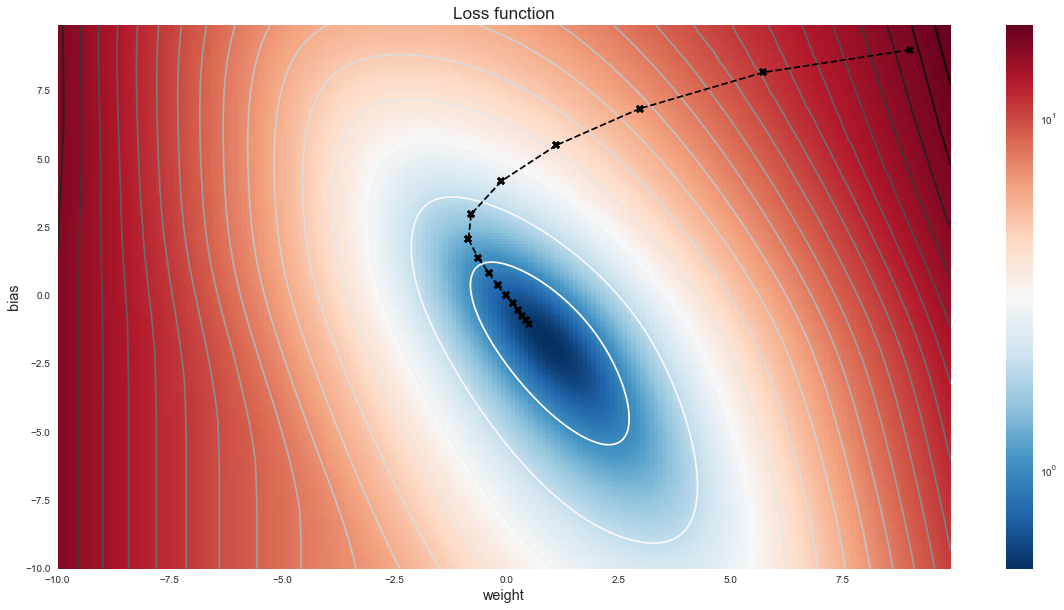

In [187]:
fig , ax_loss = plt.subplots(figsize=(20,10))
plt.pcolor(x_grid , y_grid , loss_grid , norm=colors.LogNorm() , cmap='RdBu_r')
plt.colorbar()
contour = plt.contour(x_grid, y_grid, loss_grid,20)
plt.title('Loss function',fontsize='xx-large')
plt.xlabel('weight',fontsize='x-large')
plt.ylabel('bias',fontsize='x-large')

model = initialise_keras_model(reg=.05)
steps = 15
for i in range(steps):
    old_weight, old_bias = model.get_weights()[0][0][0], model.get_weights()[1][0]
    model.fit(x,y,verbose=0,epochs = 8)
    weight, bias = model.get_weights()[0][0][0], model.get_weights()[1][0]
    plt.plot([old_weight,weight],[old_bias,bias],'kX--',markersize=8)

# (Section 3) Neural Networks: when linear methods are not sufficient

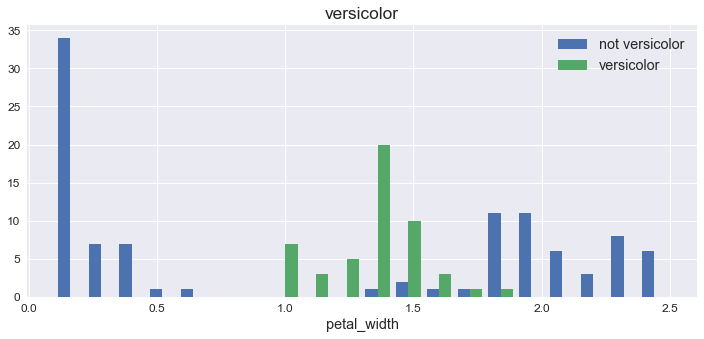

In [188]:
plot_histogram('versicolor','petal_width')

## Goal: determine if an iris is a versicolor knowing its petal width

## First let's try using logistic regression

In [189]:
x = iris.petal_width
y = iris.species.apply(lambda x: 1 if x=='versicolor' else 0)
x_train, x_test, y_train, y_test = \
sklearn.model_selection.train_test_split(x,y,test_size = 0.2,random_state=0)

In [190]:
model_versicolor = Sequential()
model_versicolor.add(Dense(1, input_dim=1 , kernel_regularizer=regularizers.l2(.1)))
model_versicolor.add(Activation('sigmoid'))
model_versicolor.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [191]:
model_versicolor.fit(x_train,y_train,epochs=1000)

Epoch 1/1000
120/120 [==============================] - 0s 3ms/step - loss: 0.7263 - acc: 0.3083
Epoch 2/1000
120/120 [==============================] - 0s 63us/step - loss: 0.7208 - acc: 0.3333
Epoch 3/1000
120/120 [==============================] - 0s 62us/step - loss: 0.7156 - acc: 0.4167
Epoch 4/1000
120/120 [==============================] - 0s 68us/step - loss: 0.7108 - acc: 0.5500
Epoch 5/1000
120/120 [==============================] - 0s 69us/step - loss: 0.7062 - acc: 0.6083
Epoch 6/1000
120/120 [==============================] - 0s 61us/step - loss: 0.7018 - acc: 0.6333
Epoch 7/1000
120/120 [==============================] - 0s 63us/step - loss: 0.6977 - acc: 0.6333
Epoch 8/1000
120/120 [==============================] - 0s 84us/step - loss: 0.6938 - acc: 0.6000
Epoch 9/1000
120/120 [==============================] - 0s 65us/step - loss: 0.6904 - acc: 0.4500
Epoch 10/1000
120/120 [==============================] - 0s 60us/step - loss: 0.6872 - acc: 0.4667
Epoch 11/1000
120/12

120/120 [==============================] - 0s 66us/step - loss: 0.6328 - acc: 0.6917
Epoch 84/1000
120/120 [==============================] - 0s 61us/step - loss: 0.6327 - acc: 0.6917
Epoch 85/1000
120/120 [==============================] - 0s 59us/step - loss: 0.6325 - acc: 0.6917
Epoch 86/1000
120/120 [==============================] - 0s 53us/step - loss: 0.6324 - acc: 0.6917
Epoch 87/1000
120/120 [==============================] - 0s 68us/step - loss: 0.6323 - acc: 0.6917
Epoch 88/1000
120/120 [==============================] - 0s 80us/step - loss: 0.6321 - acc: 0.6917
Epoch 89/1000
120/120 [==============================] - 0s 58us/step - loss: 0.6320 - acc: 0.6917
Epoch 90/1000
120/120 [==============================] - 0s 63us/step - loss: 0.6321 - acc: 0.6917
Epoch 91/1000
120/120 [==============================] - 0s 72us/step - loss: 0.6318 - acc: 0.6917
Epoch 92/1000
120/120 [==============================] - 0s 91us/step - loss: 0.6316 - acc: 0.6917
Epoch 93/1000
120/120 [=

120/120 [==============================] - 0s 60us/step - loss: 0.6253 - acc: 0.6917
Epoch 165/1000
120/120 [==============================] - 0s 80us/step - loss: 0.6252 - acc: 0.6917
Epoch 166/1000
120/120 [==============================] - 0s 57us/step - loss: 0.6252 - acc: 0.6917
Epoch 167/1000
120/120 [==============================] - 0s 60us/step - loss: 0.6250 - acc: 0.6917
Epoch 168/1000
120/120 [==============================] - 0s 57us/step - loss: 0.6250 - acc: 0.6917
Epoch 169/1000
120/120 [==============================] - 0s 58us/step - loss: 0.6250 - acc: 0.6917
Epoch 170/1000
120/120 [==============================] - 0s 63us/step - loss: 0.6249 - acc: 0.6917
Epoch 171/1000
120/120 [==============================] - 0s 64us/step - loss: 0.6248 - acc: 0.6917
Epoch 172/1000
120/120 [==============================] - 0s 70us/step - loss: 0.6247 - acc: 0.6917
Epoch 173/1000
120/120 [==============================] - 0s 63us/step - loss: 0.6247 - acc: 0.6917
Epoch 174/1000


120/120 [==============================] - 0s 56us/step - loss: 0.6214 - acc: 0.6917
Epoch 246/1000
120/120 [==============================] - 0s 54us/step - loss: 0.6214 - acc: 0.6917
Epoch 247/1000
120/120 [==============================] - 0s 56us/step - loss: 0.6213 - acc: 0.6917
Epoch 248/1000
120/120 [==============================] - 0s 66us/step - loss: 0.6212 - acc: 0.6917
Epoch 249/1000
120/120 [==============================] - 0s 62us/step - loss: 0.6212 - acc: 0.6917
Epoch 250/1000
120/120 [==============================] - 0s 59us/step - loss: 0.6212 - acc: 0.6917
Epoch 251/1000
120/120 [==============================] - 0s 61us/step - loss: 0.6211 - acc: 0.6917
Epoch 252/1000
120/120 [==============================] - 0s 59us/step - loss: 0.6211 - acc: 0.6917
Epoch 253/1000
120/120 [==============================] - 0s 69us/step - loss: 0.6211 - acc: 0.6917
Epoch 254/1000
120/120 [==============================] - 0s 60us/step - loss: 0.6210 - acc: 0.6917
Epoch 255/1000


120/120 [==============================] - 0s 62us/step - loss: 0.6192 - acc: 0.6917
Epoch 327/1000
120/120 [==============================] - 0s 59us/step - loss: 0.6192 - acc: 0.6917
Epoch 328/1000
120/120 [==============================] - 0s 60us/step - loss: 0.6192 - acc: 0.6917
Epoch 329/1000
120/120 [==============================] - ETA: 0s - loss: 0.6439 - acc: 0.656 - 0s 61us/step - loss: 0.6191 - acc: 0.6917
Epoch 330/1000
120/120 [==============================] - 0s 65us/step - loss: 0.6191 - acc: 0.6917
Epoch 331/1000
120/120 [==============================] - 0s 65us/step - loss: 0.6191 - acc: 0.6917
Epoch 332/1000
120/120 [==============================] - 0s 60us/step - loss: 0.6191 - acc: 0.6917
Epoch 333/1000
120/120 [==============================] - 0s 60us/step - loss: 0.6190 - acc: 0.6917
Epoch 334/1000
120/120 [==============================] - 0s 59us/step - loss: 0.6191 - acc: 0.6917
Epoch 335/1000
120/120 [==============================] - 0s 62us/step - loss

120/120 [==============================] - 0s 58us/step - loss: 0.6181 - acc: 0.6917
Epoch 407/1000
120/120 [==============================] - 0s 67us/step - loss: 0.6181 - acc: 0.6917
Epoch 408/1000
120/120 [==============================] - 0s 58us/step - loss: 0.6181 - acc: 0.6917
Epoch 409/1000
120/120 [==============================] - 0s 55us/step - loss: 0.6180 - acc: 0.6917
Epoch 410/1000
120/120 [==============================] - ETA: 0s - loss: 0.6218 - acc: 0.687 - 0s 59us/step - loss: 0.6179 - acc: 0.6917
Epoch 411/1000
120/120 [==============================] - 0s 57us/step - loss: 0.6179 - acc: 0.6917
Epoch 412/1000
120/120 [==============================] - ETA: 0s - loss: 0.6218 - acc: 0.687 - 0s 62us/step - loss: 0.6180 - acc: 0.6917
Epoch 413/1000
120/120 [==============================] - 0s 61us/step - loss: 0.6179 - acc: 0.6917
Epoch 414/1000
120/120 [==============================] - 0s 69us/step - loss: 0.6179 - acc: 0.6917
Epoch 415/1000
120/120 [===============

120/120 [==============================] - 0s 68us/step - loss: 0.6174 - acc: 0.6917
Epoch 487/1000
120/120 [==============================] - 0s 56us/step - loss: 0.6174 - acc: 0.6917
Epoch 488/1000
120/120 [==============================] - 0s 51us/step - loss: 0.6176 - acc: 0.6917
Epoch 489/1000
120/120 [==============================] - 0s 57us/step - loss: 0.6174 - acc: 0.6917
Epoch 490/1000
120/120 [==============================] - 0s 63us/step - loss: 0.6173 - acc: 0.6917
Epoch 491/1000
120/120 [==============================] - 0s 72us/step - loss: 0.6173 - acc: 0.6917
Epoch 492/1000
120/120 [==============================] - 0s 63us/step - loss: 0.6173 - acc: 0.6917
Epoch 493/1000
120/120 [==============================] - 0s 59us/step - loss: 0.6174 - acc: 0.6917
Epoch 494/1000
120/120 [==============================] - 0s 57us/step - loss: 0.6173 - acc: 0.6917
Epoch 495/1000
120/120 [==============================] - 0s 56us/step - loss: 0.6173 - acc: 0.6917
Epoch 496/1000


120/120 [==============================] - 0s 61us/step - loss: 0.6170 - acc: 0.6917
Epoch 567/1000
120/120 [==============================] - 0s 56us/step - loss: 0.6170 - acc: 0.6917
Epoch 568/1000
120/120 [==============================] - 0s 56us/step - loss: 0.6170 - acc: 0.6917
Epoch 569/1000
120/120 [==============================] - 0s 67us/step - loss: 0.6171 - acc: 0.6917
Epoch 570/1000
120/120 [==============================] - ETA: 0s - loss: 0.6449 - acc: 0.656 - 0s 55us/step - loss: 0.6170 - acc: 0.6917
Epoch 571/1000
120/120 [==============================] - 0s 58us/step - loss: 0.6170 - acc: 0.6917
Epoch 572/1000
120/120 [==============================] - 0s 56us/step - loss: 0.6170 - acc: 0.6917
Epoch 573/1000
120/120 [==============================] - 0s 60us/step - loss: 0.6169 - acc: 0.6917
Epoch 574/1000
120/120 [==============================] - 0s 60us/step - loss: 0.6170 - acc: 0.6917
Epoch 575/1000
120/120 [==============================] - 0s 66us/step - loss

120/120 [==============================] - 0s 58us/step - loss: 0.6168 - acc: 0.6917
Epoch 647/1000
120/120 [==============================] - 0s 60us/step - loss: 0.6168 - acc: 0.6917
Epoch 648/1000
120/120 [==============================] - 0s 60us/step - loss: 0.6168 - acc: 0.6917
Epoch 649/1000
120/120 [==============================] - 0s 61us/step - loss: 0.6168 - acc: 0.6917
Epoch 650/1000
120/120 [==============================] - 0s 62us/step - loss: 0.6168 - acc: 0.6917
Epoch 651/1000
120/120 [==============================] - 0s 61us/step - loss: 0.6170 - acc: 0.6917
Epoch 652/1000
120/120 [==============================] - 0s 61us/step - loss: 0.6168 - acc: 0.6917
Epoch 653/1000
120/120 [==============================] - 0s 60us/step - loss: 0.6168 - acc: 0.6917
Epoch 654/1000
120/120 [==============================] - 0s 59us/step - loss: 0.6168 - acc: 0.6917
Epoch 655/1000
120/120 [==============================] - 0s 61us/step - loss: 0.6168 - acc: 0.6917
Epoch 656/1000


120/120 [==============================] - 0s 67us/step - loss: 0.6167 - acc: 0.6917
Epoch 727/1000
120/120 [==============================] - 0s 72us/step - loss: 0.6167 - acc: 0.6917
Epoch 728/1000
120/120 [==============================] - 0s 61us/step - loss: 0.6167 - acc: 0.6917
Epoch 729/1000
120/120 [==============================] - 0s 58us/step - loss: 0.6167 - acc: 0.6917
Epoch 730/1000
120/120 [==============================] - 0s 68us/step - loss: 0.6168 - acc: 0.6917
Epoch 731/1000
120/120 [==============================] - 0s 59us/step - loss: 0.6168 - acc: 0.6917
Epoch 732/1000
120/120 [==============================] - 0s 63us/step - loss: 0.6167 - acc: 0.6917
Epoch 733/1000
120/120 [==============================] - 0s 73us/step - loss: 0.6168 - acc: 0.6917
Epoch 734/1000
120/120 [==============================] - 0s 61us/step - loss: 0.6167 - acc: 0.6917
Epoch 735/1000
120/120 [==============================] - 0s 61us/step - loss: 0.6167 - acc: 0.6917
Epoch 736/1000


120/120 [==============================] - 0s 61us/step - loss: 0.6166 - acc: 0.6917
Epoch 808/1000
120/120 [==============================] - 0s 64us/step - loss: 0.6166 - acc: 0.6917
Epoch 809/1000
120/120 [==============================] - 0s 63us/step - loss: 0.6166 - acc: 0.6917
Epoch 810/1000
120/120 [==============================] - 0s 63us/step - loss: 0.6167 - acc: 0.6917
Epoch 811/1000
120/120 [==============================] - 0s 55us/step - loss: 0.6167 - acc: 0.6917
Epoch 812/1000
120/120 [==============================] - 0s 62us/step - loss: 0.6168 - acc: 0.6917
Epoch 813/1000
120/120 [==============================] - 0s 63us/step - loss: 0.6166 - acc: 0.6917
Epoch 814/1000
120/120 [==============================] - 0s 69us/step - loss: 0.6166 - acc: 0.6917
Epoch 815/1000
120/120 [==============================] - 0s 57us/step - loss: 0.6166 - acc: 0.6917
Epoch 816/1000
120/120 [==============================] - 0s 62us/step - loss: 0.6166 - acc: 0.6917
Epoch 817/1000


120/120 [==============================] - 0s 60us/step - loss: 0.6166 - acc: 0.6917
Epoch 889/1000
120/120 [==============================] - 0s 60us/step - loss: 0.6166 - acc: 0.6917
Epoch 890/1000
120/120 [==============================] - 0s 72us/step - loss: 0.6166 - acc: 0.6917
Epoch 891/1000
120/120 [==============================] - 0s 65us/step - loss: 0.6167 - acc: 0.6917
Epoch 892/1000
120/120 [==============================] - 0s 68us/step - loss: 0.6166 - acc: 0.6917
Epoch 893/1000
120/120 [==============================] - 0s 59us/step - loss: 0.6166 - acc: 0.6917
Epoch 894/1000
120/120 [==============================] - 0s 63us/step - loss: 0.6166 - acc: 0.6917
Epoch 895/1000
120/120 [==============================] - 0s 77us/step - loss: 0.6166 - acc: 0.6917
Epoch 896/1000
120/120 [==============================] - 0s 65us/step - loss: 0.6166 - acc: 0.6917
Epoch 897/1000
120/120 [==============================] - 0s 72us/step - loss: 0.6166 - acc: 0.6917
Epoch 898/1000


120/120 [==============================] - 0s 66us/step - loss: 0.6166 - acc: 0.6917
Epoch 970/1000
120/120 [==============================] - 0s 65us/step - loss: 0.6166 - acc: 0.6917
Epoch 971/1000
120/120 [==============================] - 0s 67us/step - loss: 0.6166 - acc: 0.6917
Epoch 972/1000
120/120 [==============================] - 0s 78us/step - loss: 0.6166 - acc: 0.6917
Epoch 973/1000
120/120 [==============================] - 0s 72us/step - loss: 0.6166 - acc: 0.6917
Epoch 974/1000
120/120 [==============================] - 0s 68us/step - loss: 0.6166 - acc: 0.6917
Epoch 975/1000
120/120 [==============================] - 0s 75us/step - loss: 0.6166 - acc: 0.6917
Epoch 976/1000
120/120 [==============================] - 0s 63us/step - loss: 0.6166 - acc: 0.6917
Epoch 977/1000
120/120 [==============================] - ETA: 0s - loss: 0.5701 - acc: 0.750 - 0s 72us/step - loss: 0.6166 - acc: 0.6917
Epoch 978/1000
120/120 [==============================] - 0s 67us/step - loss

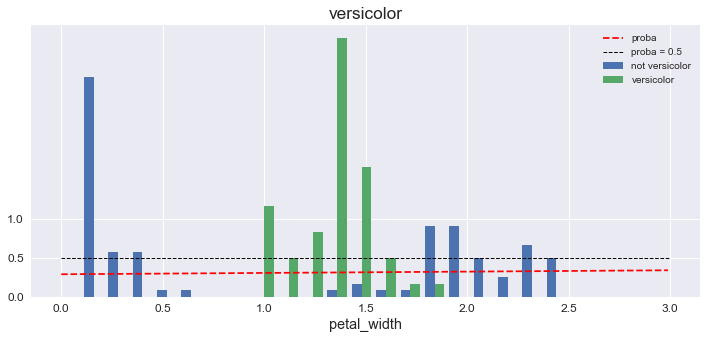

In [192]:
plot_histogram('versicolor','petal_width',normed=True)
petal_widths = np.arange(0,3,0.01)
probas = model_versicolor.predict(petal_widths.reshape(-1,1))[:,0]
plt.plot(petal_widths,probas,'r--',label='proba')
plt.plot([0,3],[.5,.5],'k--',linewidth=1,label = 'proba = 0.5')
plt.legend()
plt.yticks([0,0.5,1]);

## Now let's add a new layer to the neural network

In [193]:
def initialize_versicolor_model(lr = .1,h=5):
    model = Sequential()
    model.add(Dense(h, input_dim=1 ) )
    model.add(Activation('sigmoid'))
    model.add(Dense(1, input_dim=1 ) )
    model.add(Activation('sigmoid'))
    sgd = optimizers.SGD(lr=lr)
    model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [194]:
model_versicolor = initialize_versicolor_model()

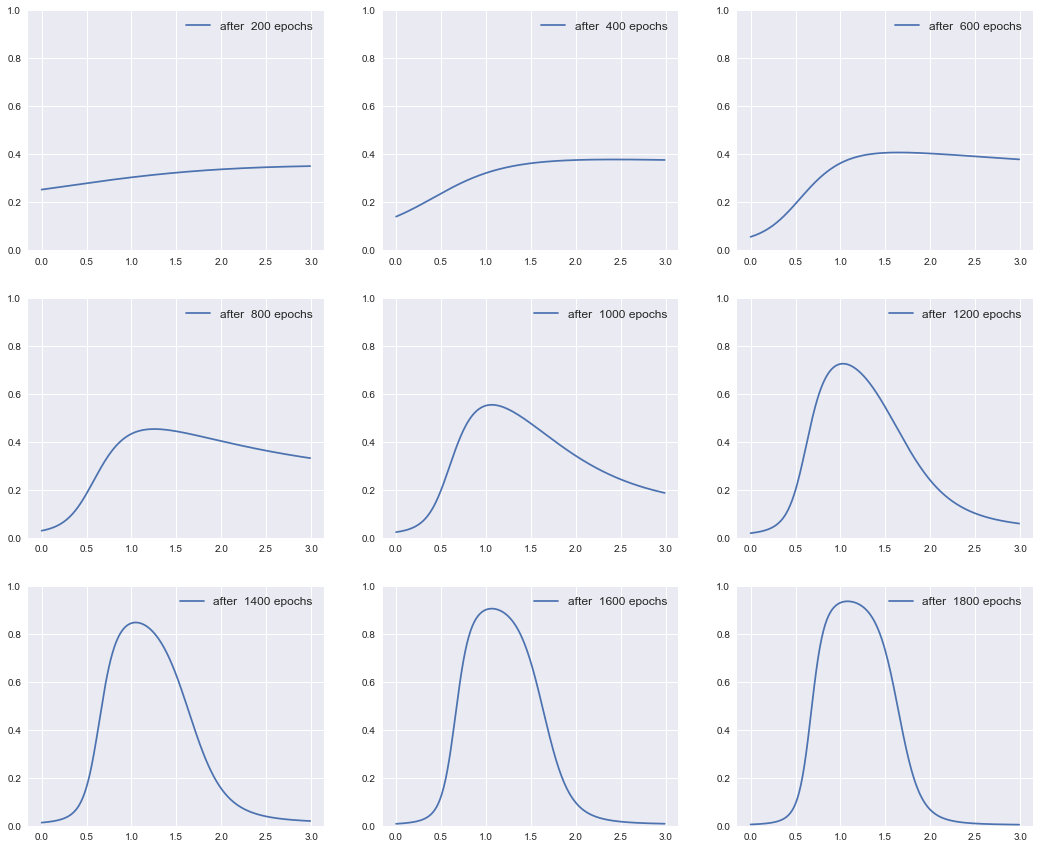

In [195]:
n_rows = n_cols = 3
plt.subplots(n_rows,n_cols,figsize=(18,15),sharex=True,sharey=True)
epochs=200
petal_widths = np.arange(0,3,0.01)
for i in range(1,n_rows**2+1):
    plt.subplot(n_rows,n_cols, i)
    model_versicolor.fit(x_train,y_train,epochs=epochs,verbose=0)
    probas = model_versicolor.predict(petal_widths.reshape(-1,1))[:,0]
    plt.plot(petal_widths,probas,label='after  {} epochs'.format(i*epochs))
    plt.ylim((0,1))
    plt.legend(fontsize='large')

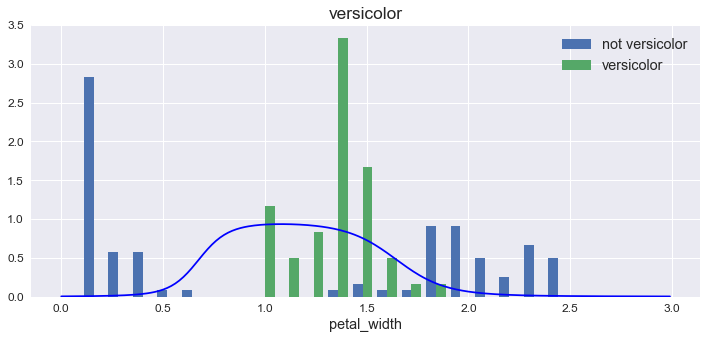

In [196]:
plot_histogram('versicolor','petal_width',normed=True)
probas = model_versicolor.predict(petal_widths.reshape(-1,1))[:,0]
plt.plot(petal_widths,probas,'b',label='after  {} epochs'.format(i))